#Import the required libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path="https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
#columns= ['age','anemia','high blood pressure', 'CPK', 'diabetes', 'ejection fraction', 'platelets', 'sex', 'serum creatinine', 'serum sodium', 'smoking', 'time', 'death event']
df = pd.read_csv(path, index_col = None, na_values=['?', ''])
df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


#Lets run the info method on the dataframe to see the datatype of each column in the dataframe as well as the number of non-null values in each column.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#Now I am going to use the describe method on the dataframe to get some statistical information from data such as the mean, standard deviation, min and max values within each column.

In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#Lets build a seaborn heatmap to help visualize how all attributes correlate against the target variable DEATH EVENT.  I Will set the font scale to 1.5 and the figure size to 20 by 15 to help make the heatmap more readable.

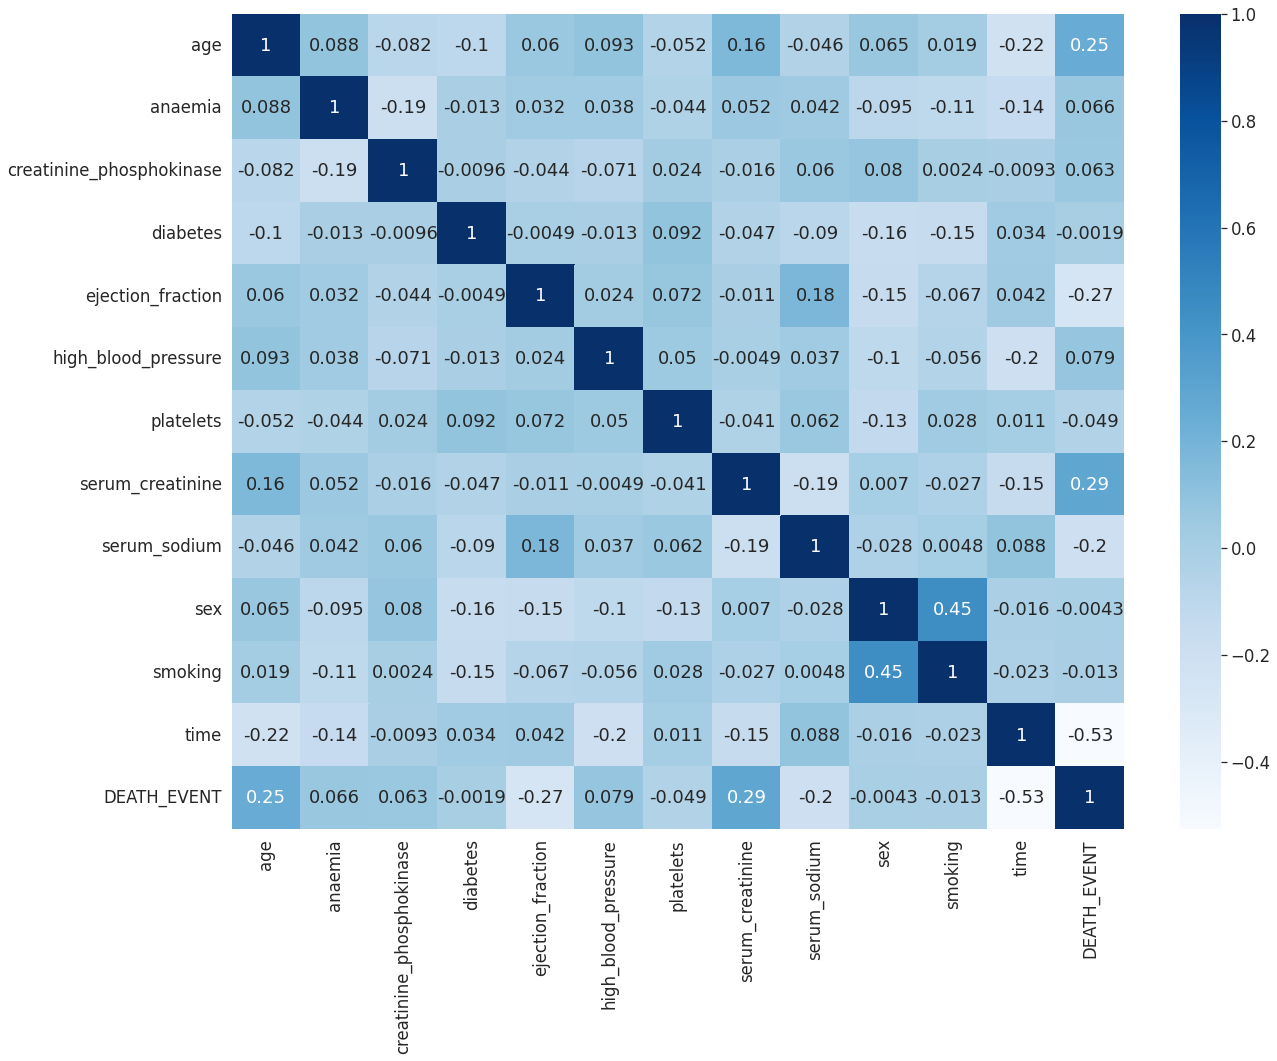

In [4]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

#Now that we have seen the heatmap, lets check how each column correlates with the target variable Death Event. I will sort the order of the values in decending order. I am also going to set the decimal format to allow only 2 values to allow for clearer evaluation of the data.

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
corr = df.corr()
corr['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.00
serum_creatinine            0.29
age                         0.25
high_blood_pressure         0.08
anaemia                     0.07
creatinine_phosphokinase    0.06
diabetes                   -0.00
sex                        -0.00
smoking                    -0.01
platelets                  -0.05
serum_sodium               -0.20
ejection_fraction          -0.27
time                       -0.53
Name: DEATH_EVENT, dtype: float64

#Now lets get all the column attributes which are greater than zero and less than 0.2 as well as those less than 0 but greater than 0.2.  This will show us the features which will be used for training for the logistic regression algorithm.

In [6]:
features_tobe_kept = corr['DEATH_EVENT'][(corr['DEATH_EVENT'] < -0.19) | ((corr['DEATH_EVENT'] > 0.2) & (corr['DEATH_EVENT'] <1))]   
features_tobe_kept

age                  0.25
ejection_fraction   -0.27
serum_creatinine     0.29
serum_sodium        -0.20
time                -0.53
Name: DEATH_EVENT, dtype: float64

#Now that we have seen the features that we are going to keep lets extract the features we are going to removed.  This will be anything less than zero but greater than 0.2 as well as anything greater than 0 but less than 0.2

In [7]:
features_tobe_removed = corr['DEATH_EVENT'][((corr['DEATH_EVENT'] > -0.2) & (corr['DEATH_EVENT'] <0)) | ((corr['DEATH_EVENT'] > 0) & (corr['DEATH_EVENT'] <0.2))]
features_tobe_removed

anaemia                     0.07
creatinine_phosphokinase    0.06
diabetes                   -0.00
high_blood_pressure         0.08
platelets                  -0.05
serum_sodium               -0.20
sex                        -0.00
smoking                    -0.01
Name: DEATH_EVENT, dtype: float64

#Here i will take the throw away features and turn them into a list to be dropped from the dataframe.

In [8]:
thf = features_tobe_removed.keys()
throw_list = thf.to_list()
throw_list

['anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'high_blood_pressure',
 'platelets',
 'serum_sodium',
 'sex',
 'smoking']

#Also before going any further, lets see how many null values exist within each column of the dataset.

In [9]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#Now that we have verified that there are no missing values within any of the columns of the dataset let drop the features to be removed for the dataset.

In [10]:
df.drop(throw_list, axis = 1,inplace=True)



#Now lets assign the column DEATH EVENT to the variable y in preparation for fitting the machine learning algorithm.

In [11]:
y = df['DEATH_EVENT']

#With the DEATH_EVENT column assinged to the y variable we can now drop it from the dataset to allow for further preprocessing of the dataset.

In [12]:
df.drop(['DEATH_EVENT'], axis = 1,inplace=True)

#Now that each of the features that we are keeping in the dataset are all numerical I am going to check the distribution of each of the columns.  I am doing so just to get an initial view of the distribution of the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f677e467710>,
      dtype=object)

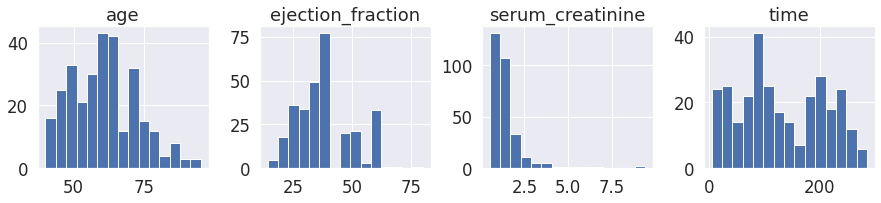

In [13]:
df.hist(bins=15, figsize=(15,6), layout=(2,4))

In [14]:
df.drop('time', axis=1, inplace=True)

#Now I am going to scale the data of the numerical dataframe using the StandardScaler class so that the data ranges are not as varied.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Lets now train a Logistic Regression Algorithm

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, random_state = 43)
lr = LogisticRegression(C=1)
lr.fit(X_train, y_train)
print("Training score is: {:.2f}".format(lr.score(X_train, y_train)))
print('Test score is:{:.2f}'.format(lr.score(X_test, y_test)))

Training score is: 0.76
Test score is:0.72


#One last time lets train a logistic regression algoritm with 5 seperate values to evaluate the results of each.

In [17]:
C = [.001, .01, 1, 10,  100]
for i in C:
    lreg = LogisticRegression(C = i)
    lreg.fit(X_train,y_train)
    print("Training set for C = {} is a score of {:.2f} ".format(i, lreg.score(X_train, y_train)))
    print("Test set for C = {} is a score of {:.2f} ".format(i, lreg.score(X_test, y_test)))

Training set for C = 0.001 is a score of 0.71 
Test set for C = 0.001 is a score of 0.57 
Training set for C = 0.01 is a score of 0.72 
Test set for C = 0.01 is a score of 0.57 
Training set for C = 1 is a score of 0.76 
Test set for C = 1 is a score of 0.72 
Training set for C = 10 is a score of 0.77 
Test set for C = 10 is a score of 0.73 
Training set for C = 100 is a score of 0.77 
Test set for C = 100 is a score of 0.73 
